<a href="https://colab.research.google.com/github/ABUALHUSSEIN/IBM-DA0101EN-Analyzing-Data-with-Python/blob/main/Ridge_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Enhanced Ridge Regression with Comprehensive Visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Enhanced Ridge Regression Analysis ===\n")

=== Enhanced Ridge Regression Analysis ===



In [3]:
# Step 1: Load and explore the data
print("Step 1: Loading and exploring the diabetes dataset...")
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {diabetes.feature_names}")
print(f"Target range: {y.min():.1f} to {y.max():.1f}")
print(f"Target mean: {y.mean():.1f}")


Step 1: Loading and exploring the diabetes dataset...
Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target range: 25.0 to 346.0
Target mean: 152.1


In [4]:
# Step 2: Split the data
print("\nStep 2: Splitting data into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



Step 2: Splitting data into train/test sets...
Training set size: 353 samples
Test set size: 89 samples


In [5]:
# Step 3: Set up pipeline with scaling and ridge regression
print("\nStep 3: Setting up pipeline with scaling and Ridge regression...")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])


Step 3: Setting up pipeline with scaling and Ridge regression...


In [6]:
# Step 4: Define hyperparameter grid
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'ridge__fit_intercept': [True, False]
}

In [7]:
# Step 5: Perform GridSearchCV
print("\nStep 4: Performing Grid Search with Cross-Validation...")
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    return_train_score=True
)

grid.fit(X_train, y_train)


Step 4: Performing Grid Search with Cross-Validation...


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'ridge__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [8]:
# Step 6: Extract and display results
print("\nStep 5: Grid Search Results")
results_df = pd.DataFrame(grid.cv_results_)

# Create a summary table
summary_table = []
for i in range(len(results_df)):
    summary_table.append([
        results_df.loc[i, 'param_ridge__alpha'],
        results_df.loc[i, 'param_ridge__fit_intercept'],
        f"{results_df.loc[i, 'mean_train_score']:.4f}",
        f"{results_df.loc[i, 'mean_test_score']:.4f}",
        f"{results_df.loc[i, 'std_test_score']:.4f}"
    ])

headers = ['Alpha', 'Fit Intercept', 'Train R²', 'CV R²', 'CV R² Std']
print(tabulate(summary_table, headers=headers, tablefmt='fancy_grid'))



Step 5: Grid Search Results
╒═════════╤═════════════════╤════════════╤═════════╤═════════════╕
│   Alpha │   Fit Intercept │   Train R² │   CV R² │   CV R² Std │
╞═════════╪═════════════════╪════════════╪═════════╪═════════════╡
│    0.01 │               1 │     0.5311 │  0.4493 │      0.144  │
├─────────┼─────────────────┼────────────┼─────────┼─────────────┤
│    0.01 │               0 │    -3.37   │ -3.6813 │      0.9237 │
├─────────┼─────────────────┼────────────┼─────────┼─────────────┤
│    0.1  │               1 │     0.5311 │  0.4496 │      0.1433 │
├─────────┼─────────────────┼────────────┼─────────┼─────────────┤
│    0.1  │               0 │    -3.37   │ -3.6809 │      0.9234 │
├─────────┼─────────────────┼────────────┼─────────┼─────────────┤
│    1    │               1 │     0.5306 │  0.4513 │      0.1388 │
├─────────┼─────────────────┼────────────┼─────────┼─────────────┤
│    1    │               0 │    -3.3705 │ -3.6788 │      0.9213 │
├─────────┼─────────────────┼────

In [9]:

# Step 7: Evaluate best model on test set
print(f"\nBest Parameters: {grid.best_params_}")
print(f"Best CV R² Score: {grid.best_score_:.4f}")

# Make predictions
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

# Calculate comprehensive metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n=== Model Performance Metrics ===")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")


Best Parameters: {'ridge__alpha': 10.0, 'ridge__fit_intercept': True}
Best CV R² Score: 0.4539

=== Model Performance Metrics ===
Training R²: 0.5248
Test R²: 0.4572
Training RMSE: 53.74
Test RMSE: 53.63
Training MAE: 43.64
Test MAE: 42.86


Text(220.72222222222223, 0.5, 'Alpha (Regularization)')

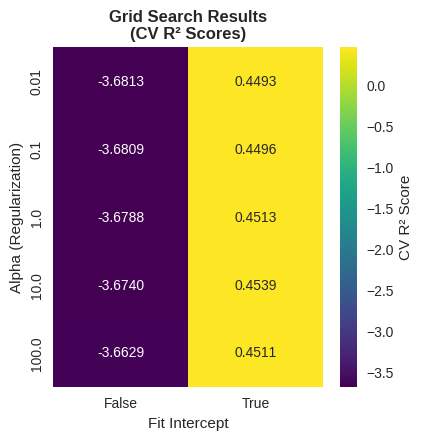

In [11]:
# ===== VISUALIZATIONS =====

# Create figure with subplots
fig = plt.figure(figsize=(20, 15))

# 1. Grid Search Results Heatmap
plt.subplot(3, 4, 1)
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_ridge__alpha',
    columns='param_ridge__fit_intercept'
)
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='viridis', cbar_kws={'label': 'CV R² Score'})
plt.title('Grid Search Results\n(CV R² Scores)', fontsize=12, fontweight='bold')
plt.xlabel('Fit Intercept')
plt.ylabel('Alpha (Regularization)')

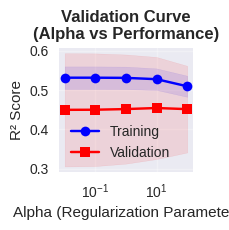

In [12]:
# 2. Alpha vs Performance
plt.subplot(3, 4, 2)
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='ridge__alpha',
    param_range=alpha_values,
    cv=5, scoring='r2', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.semilogx(alpha_values, train_mean, 'o-', color='blue', label='Training')
plt.fill_between(alpha_values, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.semilogx(alpha_values, test_mean, 's-', color='red', label='Validation')
plt.fill_between(alpha_values, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R² Score')
plt.title('Validation Curve\n(Alpha vs Performance)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

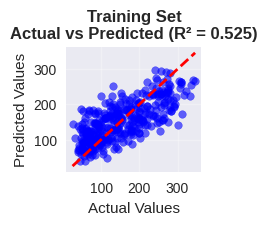

In [13]:
# 3. Actual vs Predicted (Training)
plt.subplot(3, 4, 3)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=30)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Training Set\nActual vs Predicted (R² = {train_r2:.3f})', fontweight='bold')
plt.grid(True, alpha=0.3)

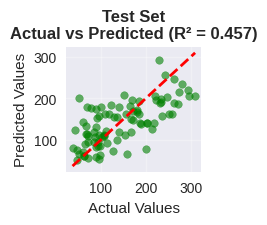

In [14]:
# 4. Actual vs Predicted (Test)
plt.subplot(3, 4, 4)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Test Set\nActual vs Predicted (R² = {test_r2:.3f})', fontweight='bold')
plt.grid(True, alpha=0.3)

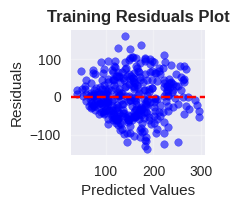

In [15]:
# 5. Residuals Plot (Training)
plt.subplot(3, 4, 5)
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train, alpha=0.6, color='blue', s=30)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Residuals Plot', fontweight='bold')
plt.grid(True, alpha=0.3)

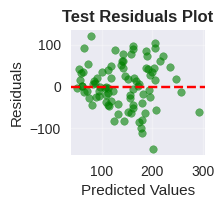

In [16]:
# 6. Residuals Plot (Test)
plt.subplot(3, 4, 6)
residuals_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuals_test, alpha=0.6, color='green', s=30)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals Plot', fontweight='bold')
plt.grid(True, alpha=0.3)

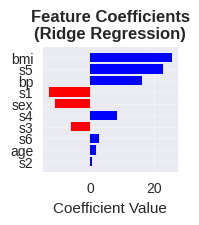

In [17]:
# 7. Feature Importance (Coefficients)
plt.subplot(3, 4, 7)
best_ridge = grid.best_estimator_.named_steps['ridge']
feature_names = diabetes.feature_names
coefficients = best_ridge.coef_

# Sort features by absolute coefficient value
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=True)

plt.barh(range(len(coef_df)), coef_df['Coefficient'], color=['red' if x < 0 else 'blue' for x in coef_df['Coefficient']])
plt.yticks(range(len(coef_df)), coef_df['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients\n(Ridge Regression)', fontweight='bold')
plt.grid(True, alpha=0.3)

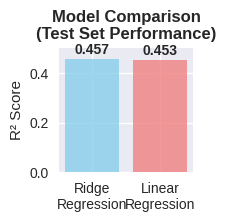

In [18]:
# 8. Model Comparison (Ridge vs Linear Regression)
plt.subplot(3, 4, 8)
# Train linear regression for comparison
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
linear_pipeline.fit(X_train, y_train)
y_test_pred_linear = linear_pipeline.predict(X_test)
linear_r2 = r2_score(y_test, y_test_pred_linear)

models = ['Ridge\nRegression', 'Linear\nRegression']
r2_scores = [test_r2, linear_r2]
colors = ['skyblue', 'lightcoral']

bars = plt.bar(models, r2_scores, color=colors, alpha=0.8)
plt.ylabel('R² Score')
plt.title('Model Comparison\n(Test Set Performance)', fontweight='bold')
plt.ylim(0, max(r2_scores) * 1.1)

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

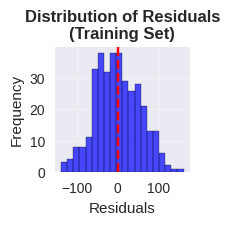

In [23]:
# 9. Distribution of Residuals (Training)
plt.subplot(3, 4, 9)
plt.hist(residuals_train, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals\n(Training Set)', fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, alpha=0.3)



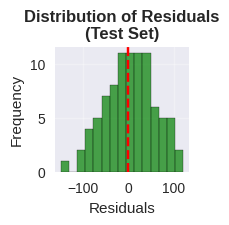

In [20]:
# 10. Distribution of Residuals (Test)
plt.subplot(3, 4, 10)
plt.hist(residuals_test, bins=15, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals\n(Test Set)', fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, alpha=0.3)

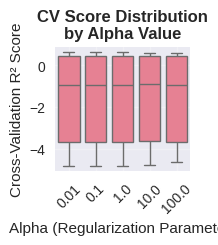

In [24]:

# 11. Cross-validation scores distribution
plt.subplot(3, 4, 11)
cv_scores = []
alphas = []
for i in range(len(results_df)):
    alpha = results_df.loc[i, 'param_ridge__alpha']
    scores = [results_df.loc[i, f'split{j}_test_score'] for j in range(5)]
    cv_scores.extend(scores)
    alphas.extend([alpha] * 5)

cv_df = pd.DataFrame({'Alpha': alphas, 'CV_Score': cv_scores})
sns.boxplot(data=cv_df, x='Alpha', y='CV_Score')
plt.xticks(rotation=45)
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Cross-Validation R² Score')
plt.title('CV Score Distribution\nby Alpha Value', fontweight='bold')
plt.grid(True, alpha=0.3)

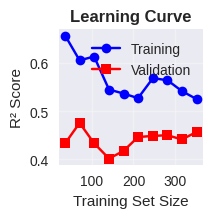


=== Additional Analysis ===

Coefficient Comparison:
╒════╤═══════════╤═══════════════╤══════════════╤══════════════════╕
│    │ Feature   │   Linear Coef │   Ridge Coef │   Abs Difference │
╞════╪═══════════╪═══════════════╪══════════════╪══════════════════╡
│  4 │ s1        │      -44.4489 │     -12.9342 │          31.5146 │
├────┼───────────┼───────────────┼──────────────┼──────────────────┤
│  5 │ s2        │       24.6410 │       0.5382 │          24.1028 │
├────┼───────────┼───────────────┼──────────────┼──────────────────┤
│  6 │ s3        │        7.6770 │      -6.1251 │          13.8021 │
├────┼───────────┼───────────────┼──────────────┼──────────────────┤
│  8 │ s5        │       35.1612 │      22.7493 │          12.4119 │
├────┼───────────┼───────────────┼──────────────┼──────────────────┤
│  7 │ s4        │       13.1388 │       8.5695 │           4.5693 │
├────┼───────────┼───────────────┼──────────────┼──────────────────┤
│  9 │ s6        │        2.3514 │       2.9181 │

In [25]:

# 12. Learning curve
plt.subplot(3, 4, 12)
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs = (train_sizes * len(X_train)).astype(int)
train_scores_lc = []
val_scores_lc = []

for train_size in train_sizes_abs:
    X_temp = X_train[:train_size]
    y_temp = y_train[:train_size]

    # Fit model
    temp_model = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=grid.best_params_['ridge__alpha']))
    ])
    temp_model.fit(X_temp, y_temp)

    # Calculate scores
    train_pred = temp_model.predict(X_temp)
    val_pred = temp_model.predict(X_test)

    train_scores_lc.append(r2_score(y_temp, train_pred))
    val_scores_lc.append(r2_score(y_test, val_pred))

plt.plot(train_sizes_abs, train_scores_lc, 'o-', color='blue', label='Training')
plt.plot(train_sizes_abs, val_scores_lc, 's-', color='red', label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional Analysis
print(f"\n=== Additional Analysis ===")

# Compare coefficients between Ridge and Linear Regression
print(f"\nCoefficient Comparison:")
linear_coef = linear_pipeline.named_steps['linear'].coef_
ridge_coef = best_ridge.coef_

coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Regression': linear_coef,
    'Ridge_Regression': ridge_coef,
    'Difference': np.abs(linear_coef - ridge_coef)
}).sort_values('Difference', ascending=False)

print(tabulate(coef_comparison, headers=['Feature', 'Linear Coef', 'Ridge Coef', 'Abs Difference'],
               tablefmt='fancy_grid', floatfmt='.4f'))

# Regularization effect
print(f"\nRegularization Effect:")
print(f"Sum of squared coefficients (Linear): {np.sum(linear_coef**2):.4f}")
print(f"Sum of squared coefficients (Ridge): {np.sum(ridge_coef**2):.4f}")
print(f"Reduction in coefficient magnitude: {(1 - np.sum(ridge_coef**2)/np.sum(linear_coef**2))*100:.1f}%")

print(f"\n=== Analysis Complete ===")